# WASTE CLASSIFICATION

PROBLEM


Waste management is a big problem in our country. Most of the wastes end up in landfills. This leads to many issues like

1. Increase in landfills

2. Eutrophication

3. Consumption of toxic waste by animals

4. Leachate

5. Increase in toxins

6. Land, water and air pollution

APPROACH


1. Studied white papers on waste management
2. Analysed the components of household waste
3. Segregated into two classes (Organic and recyclable)
4. Automated the process by using IOT and machine learning
5. Reduce toxic waste ending in landfills

IMPLEMENTATION


Dataset is divided into train data (85%) and test data (15%)  

Training data - 22564 images  Test data - 2513 images

In [1]:
import tensorflow as tf

/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nishit/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = "DATASET/TRAIN/"
TEST_DIR =  "DATASET/TEST/"

In [4]:
train_R_dir = os.path.join(TRAIN_DIR, 'R')  # directory with our training R pictures
train_O_dir = os.path.join(TRAIN_DIR, 'O')  # directory with our training O pictures
test_R_dir = os.path.join(TEST_DIR, 'R')  # directory with our validation R pictures
test_O_dir = os.path.join(TEST_DIR, 'O')  # directory with our validation O pictures

In [5]:
num_R_tr = len(os.listdir(train_R_dir))
num_O_tr = len(os.listdir(train_O_dir))

num_R_ts = len(os.listdir(test_R_dir))
num_O_ts = len(os.listdir(test_O_dir))

total_train = num_R_tr + num_O_tr
total_test = num_R_ts + num_O_ts

In [6]:
print('total training R images:', num_R_tr)
print('total training O images:', num_O_tr)

print('total test R images:', num_R_ts)
print('total test O images:', num_O_ts)
print("--")
print("Total training images:", total_train)
print("Total testing images:", total_test)

total training R images: 10000
total training O images: 12566
total test R images: 1112
total test O images: 1401
--
Total training images: 22566
Total testing images: 2513


In [7]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Data preparation
1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

Fortunately, all these tasks can be done with the ImageDataGenerator class provided by tf.keras. It can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors—helpful when training the network.

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our test data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=TRAIN_DIR,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 22564 images belonging to 2 classes.


In [10]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=TEST_DIR,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2513 images belonging to 2 classes.


# Visualize the training images by extracting a batch of images from the training generator

In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

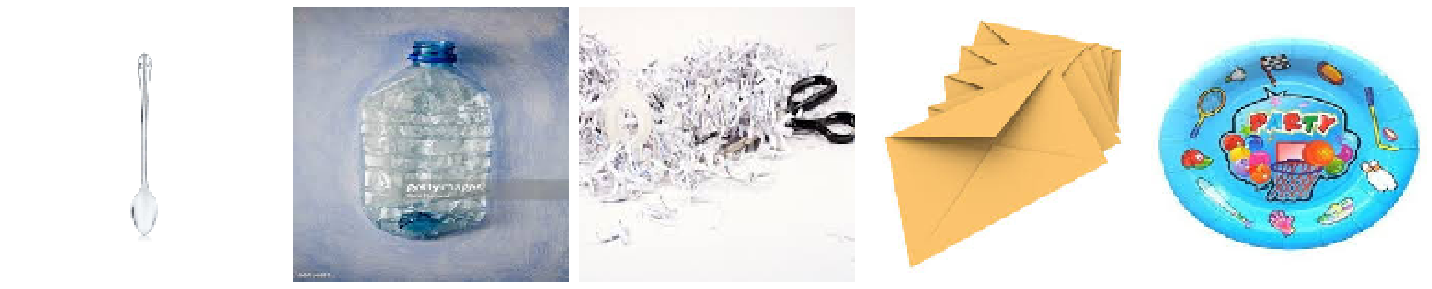

In [13]:
plotImages(sample_training_images[:5])

# Creating the CNN model

# Model 1: SelfLaid CNN Model with  3 Layers


The model consists of three convolution blocks with a max pool layer in each of them to process the dataset. This model has one fully connected layer with 512 units, i.e. it contains 512 hidden layers which was activated by the Rectified Linear Unit (ReLU) activation Function. This model was compiled with ADAM optimizer with Binary Cross Entropy loss function.

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

Instructions for updating:
Colocations handled automatically by placer.


# Compile the model, by  ADAM optimizer and binary cross entropy loss function. To view training and validation accuracy for each training epoch,

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
__________

# Using the fit_generator method of the ImageDataGenerator class to train the network.

In [17]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
177/177 [==============================] - 347s 2s/step - loss: 0.4888 - acc: 0.7800 - val_loss: 0.3266 - val_acc: 0.8540
Epoch 2/15
177/177 [==============================] - 344s 2s/step - loss: 0.3849 - acc: 0.8205 - val_loss: 0.3428 - val_acc: 0.8735
Epoch 3/15
177/177 [==============================] - 348s 2s/step - loss: 0.3478 - acc: 0.8418 - val_loss: 0.3114 - val_acc: 0.8707
Epoch 4/15
177/177 [==============================] - 349s 2s/step - loss: 0.3073 - acc: 0.8644 - val_loss: 0.2974 - val_acc: 0.8802
Epoch 5/15
177/177 [==============================] - 350s 2s/step - loss: 0.2747 - acc: 0.8795 - val_loss: 0.3339 - val_acc: 0.8317
Epoch 6/15
177/177 [==============================] - 353s 2s/step - loss: 0.2345 - acc: 0.9029 - val_loss: 0.2853 - val_acc: 0.8766
Epoch 7/15
177/177 [==============================] - 363s 2s/step - loss: 0.1893 - acc: 0.9213 - val_loss: 0.3239 - val_acc: 0.8790
Epoch 8/15
177/177 [=

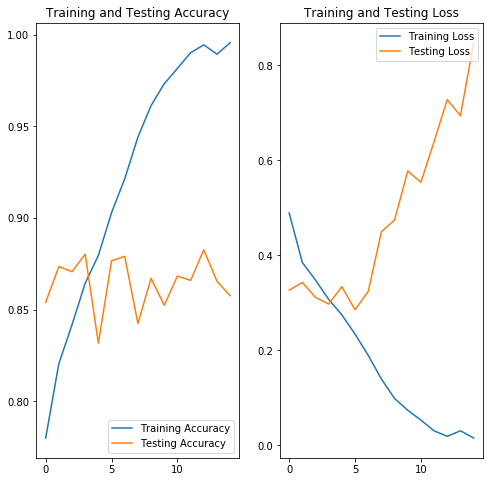

In [18]:
acc = history.history['acc']
test_acc = history.history['val_acc']

loss=history.history['loss']
test_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

# As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 80% accuracy on the validation set.

# overfitting is here

# In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 80% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

# So lets do Data augmentation

# Apply horizontal flip

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [20]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=TRAIN_DIR,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 22564 images belonging to 2 classes.


# Take one sample image from the training examples and repeat it five times so that the augmentation is applied to the same image five times.

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

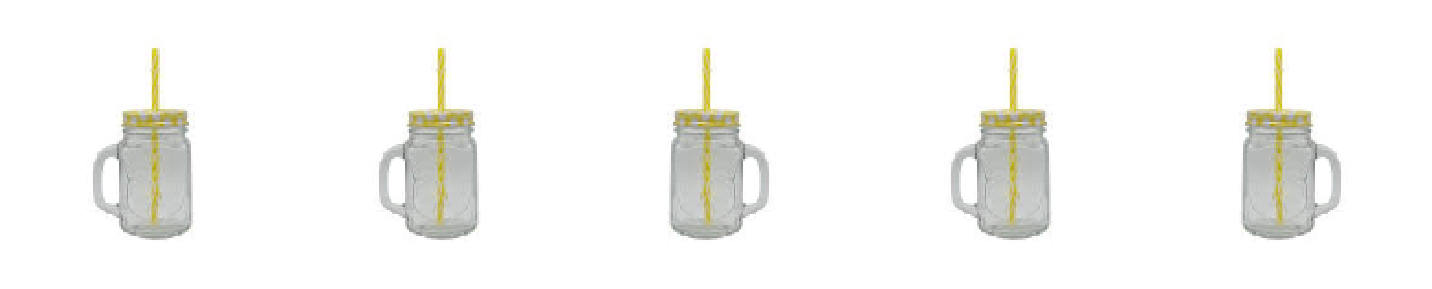

In [22]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

# Randomly rotate the image

In [23]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [24]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=TRAIN_DIR,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 22564 images belonging to 2 classes.


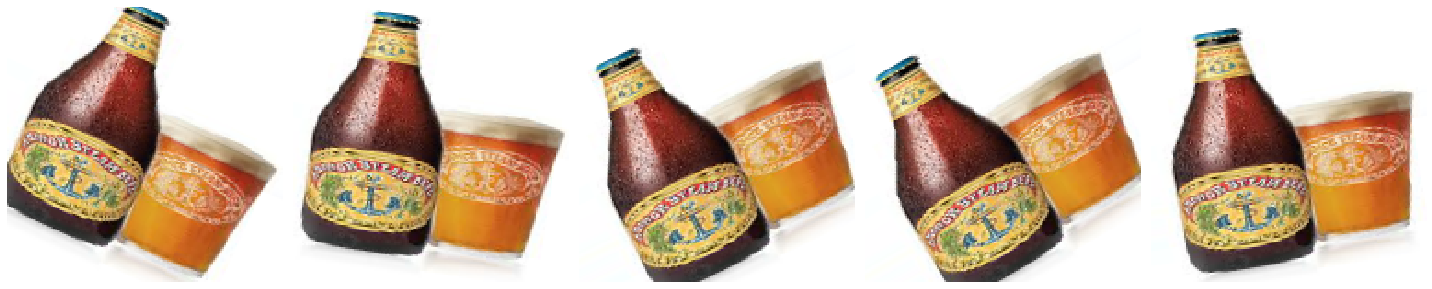

In [25]:
plotImages(augmented_images)

# Apply zoom augmentation

In [26]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [27]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=TRAIN_DIR,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 22564 images belonging to 2 classes.


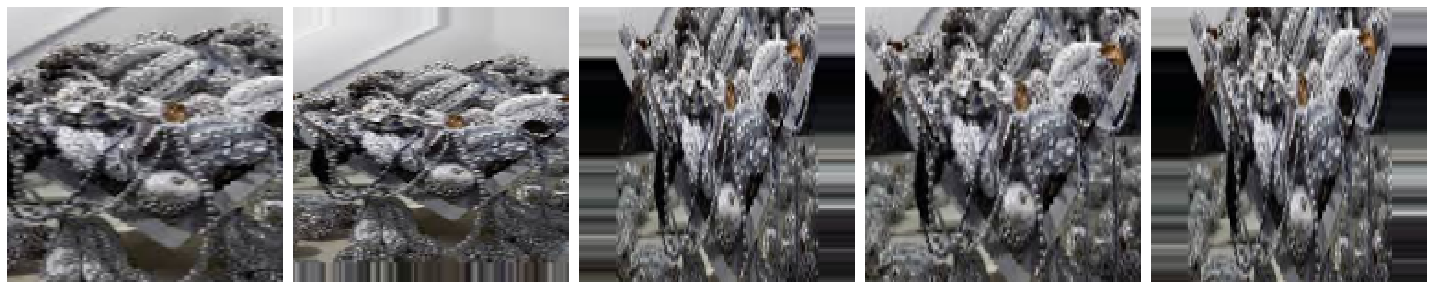

In [28]:
plotImages(augmented_images)

# Put it all together

In [29]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [30]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAIN_DIR,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 22564 images belonging to 2 classes.


# Visualize how a single image would look five different times when passing these augmentations randomly to the dataset.

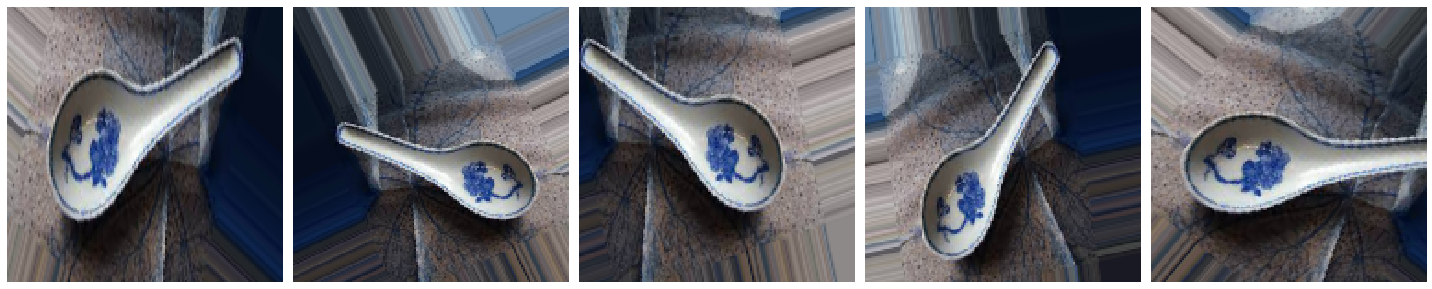

In [31]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Create validation data generator
# Generally, only apply data augmentation to the training examples. here we did, only rescale the validation images and convert them into batches using ImageDataGenerator.

In [32]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [33]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=TEST_DIR,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2513 images belonging to 2 classes.


# Creating a new network with Dropouts
# When appling 0.2 dropout to a certain layer, it randomly kills 20% of the output units in each training epoch.

# Applying dropout will randomly set 20% of the neurons to zero during each training epoch. This helps to avoid overfitting on the training dataset.

In [34]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
__________

In [36]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_test // batch_size
)

Epoch 1/15
177/177 [==============================] - 473s 3s/step - loss: 0.5308 - acc: 0.7567 - val_loss: 0.3749 - val_acc: 0.8146
Epoch 2/15
177/177 [==============================] - 483s 3s/step - loss: 0.4160 - acc: 0.8040 - val_loss: 0.3756 - val_acc: 0.8492
Epoch 3/15
177/177 [==============================] - 505s 3s/step - loss: 0.3982 - acc: 0.8148 - val_loss: 0.3043 - val_acc: 0.8536
Epoch 4/15
177/177 [==============================] - 526s 3s/step - loss: 0.3822 - acc: 0.8229 - val_loss: 0.3070 - val_acc: 0.8719
Epoch 5/15
177/177 [==============================] - 532s 3s/step - loss: 0.3724 - acc: 0.8315 - val_loss: 0.3158 - val_acc: 0.8508
Epoch 6/15
177/177 [==============================] - 534s 3s/step - loss: 0.3585 - acc: 0.8398 - val_loss: 0.2867 - val_acc: 0.8731
Epoch 7/15
177/177 [==============================] - 568s 3s/step - loss: 0.3539 - acc: 0.8398 - val_loss: 0.2722 - val_acc: 0.8770
Epoch 8/15
177/177 [==============================] - 527s 3s/step - 

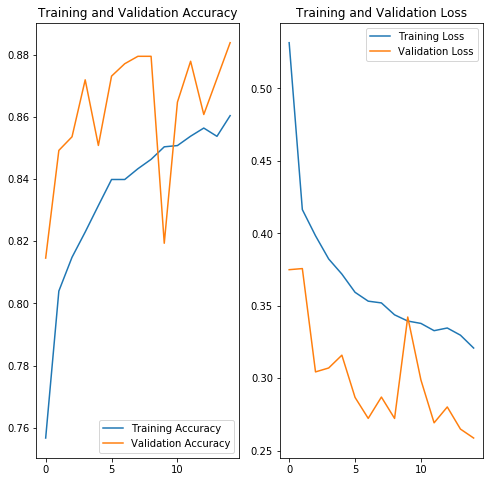

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()